# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import calendar

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

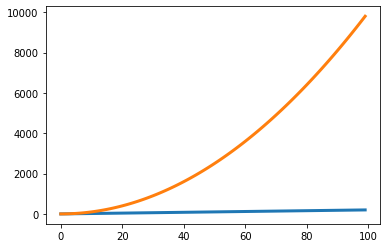

In [3]:
# Method 1 
plt.plot(x, y, lw=3)
plt.plot(x, z, lw=3)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

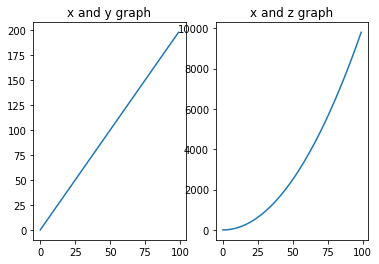

In [4]:
# Method 2
fig, [ax1, ax2] = plt.subplots(1, 2)
ax1.plot(x, y)
ax1.set_title('x and y graph')
ax2.plot(x, z)
ax2.set_title('x and z graph')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

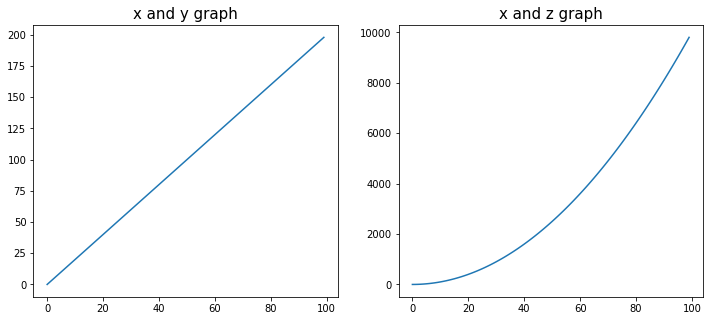

In [5]:
# your code here

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(x, y)
ax1.set_title('x and y graph', fontsize=15)
ax2.plot(x, z)
ax2.set_title('x and z graph', fontsize=15)

plt.show()

#If you already have the figure object use:

# fig, [ax1, ax2] = plt.subplots(1, 2)
# ax1.plot(x, y)
# ax1.set_title('x and y graph')
# ax2.plot(x, z)
# ax2.set_title('x and z graph')

# fig.set_figheight(5)
# fig.set_figwidth(12)
# plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

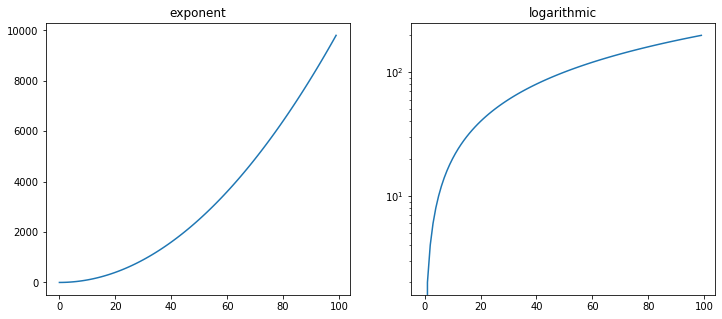

In [6]:
# your code here
fig1 = plt.figure(figsize=(12,5))

ax1 = fig1.add_subplot(1, 2, 1)
ax1.plot(x, x**2)
ax1.set_title('exponent')


ax2 = fig1.add_subplot(1, 2, 2)
ax2.plot(x, y, label='Logarithmic')
ax2.set_yscale('log')
ax2.set_title('logarithmic')


plt.show()


#### As a bonus challenge, try to add a legend to the plot.

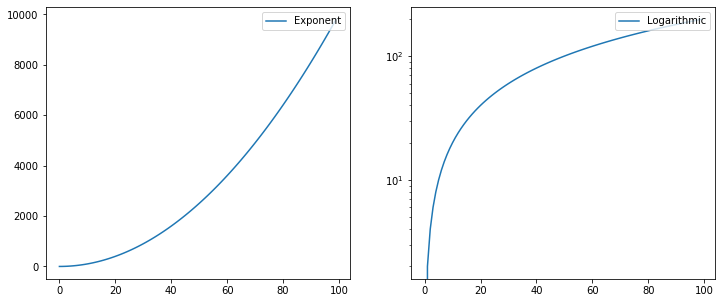

In [7]:
# your code here

fig1 =plt.figure(figsize=(12,5))

ax1 = fig1.add_subplot(1, 2, 1)
ax1.plot(x, x**2, label='Exponent')
ax1.legend(loc='upper right')
ax2 = fig1.add_subplot(1, 2, 2)
ax2.plot(x, y, label='Logarithmic')
ax2.set_yscale('log')
ax2.legend(loc='upper right')

plt.show()



## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv(f'C:/Users/tiina/dataV2-labs/module-2/Pivot-Table-Correlation/your_code/Fitbit2.csv')
fitbit.head()


,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

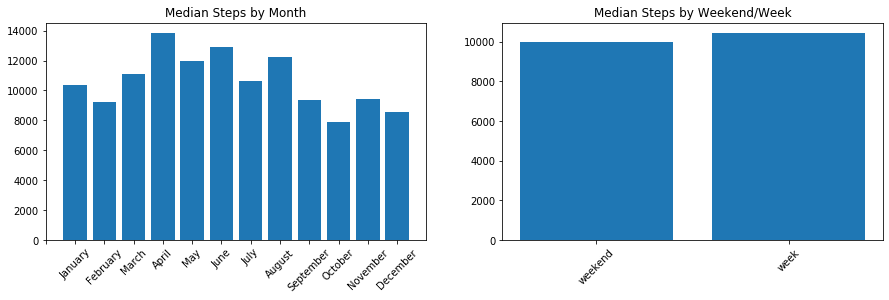

In [38]:
# MEDIAN STEPS BY MONTH_ENCODED

fig = plt.figure(figsize=(15, 4)) 


fitbit_med = fitbit.groupby('Months_encoded')[['Steps']].median().reset_index() 
fitbit_med2 =  fitbit.groupby('Work_or_Weekend')[['Steps']].median().reset_index()

x = fitbit_med['Months_encoded']
y = fitbit_med['Steps'] 

x2 = fitbit_med2['Work_or_Weekend']
y2 = fitbit_med2['Steps']


ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(x, y)
ax1.set_xticks(range(13))
ax1.set_xticklabels(calendar.month_name[:13], rotation=45)
ax1.set_title('Median Steps by Month')


ax2 = fig.add_subplot(1, 2, 2)
ax2.bar(x2,y2)
ax2.set_xticks(range(0,2))
ax2.set_xticklabels(['weekend', 'week'], rotation=45)
ax2.set_title('Median Steps by Weekend/Week')

#ax2.bar(x2, y)plt.savefig('figures/steps_work_weekend.png')

plt.savefig('figures/steps_work_weekend.png')
plt.show()



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

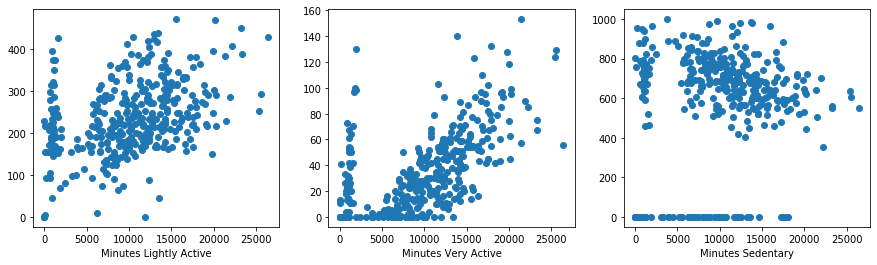

In [10]:
# your code here
fig = plt.figure(figsize=(15, 4)) 


x = fitbit['Steps']
columns = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(x, fitbit[columns[i]])
    ax.set_xlabel(columns[i])
    
plt.show()
    
    

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [11]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [12]:
# your code here
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [13]:
# NUMERICAL VARIABLES

titanic.select_dtypes(include='number').columns

Index(['Survived', 'Pclass', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [14]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include='object').columns

Index(['Name', 'Sex'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [15]:
# your code here
""" 
plt.style.use('classic'), this is so ugly I don't want to use it ;)
""" 

fig = plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

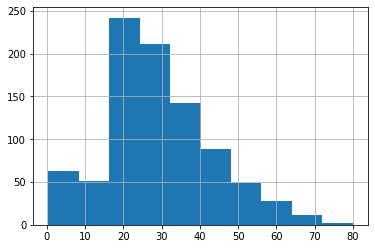

In [16]:
# your code here 
titanic['Age'].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

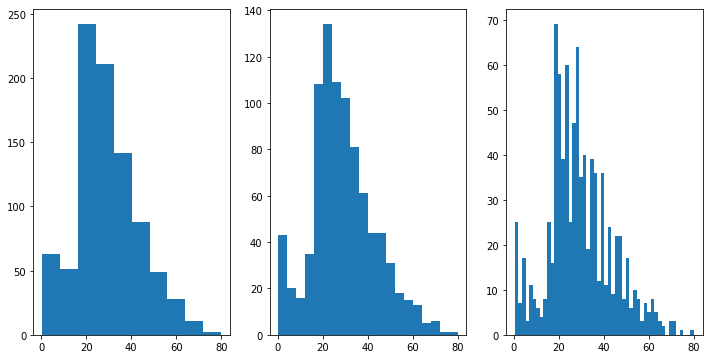

In [17]:
# your code here 

fig = plt.figure(figsize=(12,6))

data = titanic['Age']

bins = [10, 20, 50]

for i in range(len(bins)):
    ax = fig.add_subplot(1, 3, i+1)
    ax.hist(data, bins=bins[i])
    
plt.show()

#### How does the bin size affect your plot?

In [18]:
"""
Adding more bins, changes the y axis scale as the more bins there are the less distribution is ine one bin. 
Moreover, after a certain treshold there starts to be "pikes" in the chart as there aren't as many values in specific bins. 
"""

'\nAdding more bins, changes the y axis scale as the more bins there are the less distribution is ine one bin. \nMoreover, after a certain treshold there starts to be "pikes" in the chart as there aren\'t as many values in specific bins. \n'

#### Use seaborn to show the distribution of column `Age`.

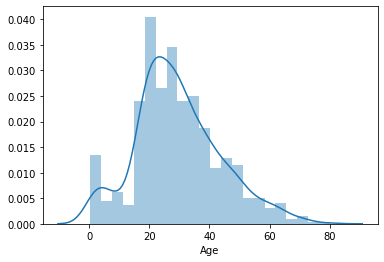

In [19]:
# your code here

sns.distplot(data)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

([<matplotlib.patches.Wedge at 0x2827e2c4b08>,
 [Text(-0.9952750051669756, -0.491454640928211, 'Male'),
  Text(0.9863085180802108, 0.487027213985439, 'Female')],
 [Text(-0.546952930767437, -0.27007867654613393, '65%'),
  Text(0.5379864644073876, 0.26565120762842126, '35%')])

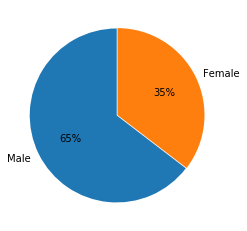

In [20]:
# Method 1 - matplotlib
# your code here
gender_count = [titanic['Sex'].value_counts()[0], titanic['Sex'].value_counts()[1]]
genders = ['Male', 'Female']
plt.pie(gender_count, labels=genders, autopct='%1.0f%%', startangle=90, explode =(0.01, 0))

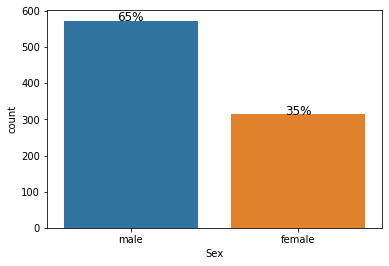

In [21]:
# Method 2 - seaborn
# your code here

# Foudn out this function from https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
# To add percentages on top of the charts 

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()


ax = sns.countplot(x=titanic['Sex'])
without_hue(ax, titanic.Sex)


#### Use the right plot to visualize the column `Pclass`.

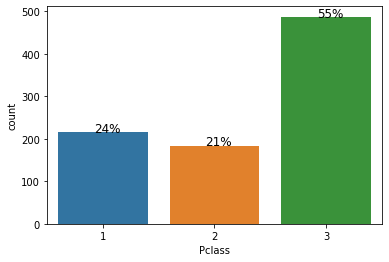

In [22]:
# your code here
ax = sns.countplot(titanic['Pclass'])
without_hue(ax, titanic.Pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

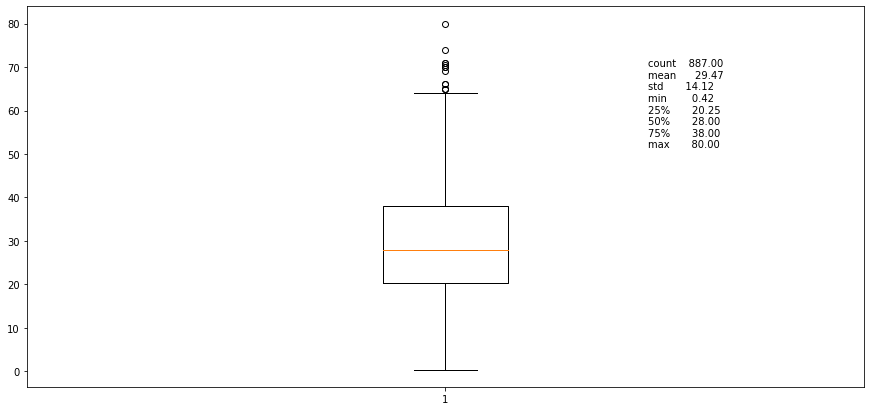

In [23]:
# your code here


fig, ax = plt.subplots(figsize=(15,7))
ax.boxplot(titanic['Age'])
plt.figtext(0.7, 0.6, round(titanic['Age'].describe(),2).to_string())
plt.show()


In [24]:
"""
I decided to use boxplot as we can interpreta  lot of information from it. Morever, I added a text of all the summary statistics.
"""

'\nI decided to use boxplot as we can interpreta  lot of information from it. Morever, I added a text of all the summary statistics.\n'

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
The average was around 30 years old. Majority of people were between 20 - 38. However, there were people of all ages on the ship.
"""

'\nThe average was around 30 years old. Majority of people were between 20 - 38. However, there were people of all ages on the ship.\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

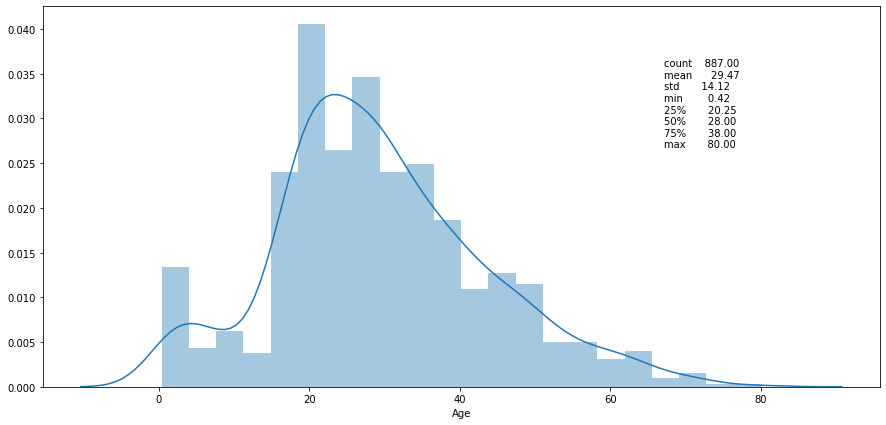

In [26]:
# your code here 
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.distplot(titanic['Age'])
plt.figtext(0.7, 0.6, round(titanic['Age'].describe(),2).to_string())
plt.show()


#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
How it is distributed. 

"""

'\nHow it is distributed. \n\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

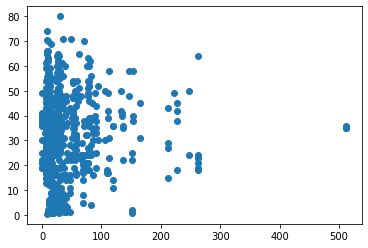

In [28]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Fare'], titanic['Age'])

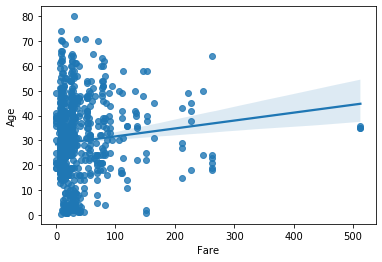

In [29]:
# Method 2 - seaborn
# your code here
sns.regplot(titanic['Fare'], titanic['Age'])

#### Plot the correlation matrix using seaborn.

(6.5, -0.5)

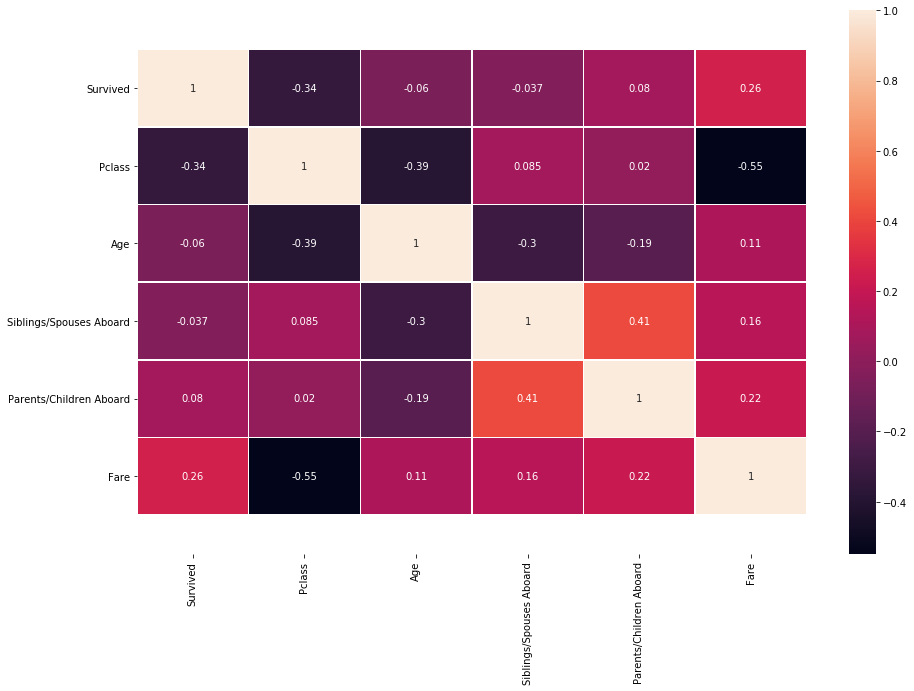

In [30]:
# your code here
fig, ax = plt.subplots(figsize=(15,10)) 
ax = sns.heatmap(titanic.corr(), annot=True, linewidths=0.5, ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) 

#### What are the most correlated features?

In [31]:
"""
Class and Fare -.055 correlation, and parents/children and siblings/spouse with 0.41"""

'\nClass and Fare -.055 correlation, and parents/children and siblings/spouse with 0.41'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

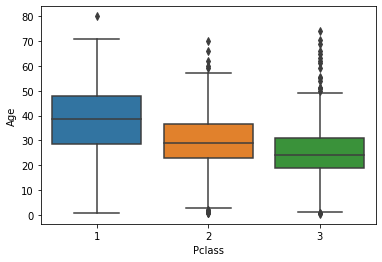

In [32]:
# your code here 

sns.boxplot(x='Pclass', y='Age',data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

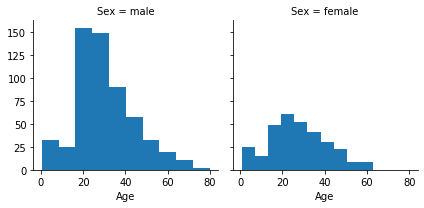

In [33]:
# your code here
g = sns.FacetGrid(titanic, col="Sex")
g = g.map(plt.hist, "Age")